# Kompleks Ağ Analizi Projesi

Bu projede, **Wikipedia Requests for Adminship (wiki-RfA)** veri seti kullanılarak büyük ölçekli bir sosyal ağ analiz edilmiştir.

Amaç; gerçek bir yönlü sosyal ağ üzerinde çeşitli metrikler hesaplayarak, yapısal özellikleri ortaya koymak, toplulukları belirlemek ve merkezi düğümleri tespit etmektir.

Çalışmada Python diliyle **NetworkX** kütüphanesi kullanılmış, ayrıca görselleştirme ve keşifsel analizler için **Gephi** aracı ile destekleyici incelemeler yapılmıştır.

> Bu analiz sayesinde ağın yoğunluğu, derece dağılımları, merkeziyet ölçütleri (PageRank, Closeness, Betweenness), topluluk yapısı gibi birçok kritik yapı aydınlatılmıştır.


## Veri Seti Tanıtımı: wiki-RfA

Kullanılan veri seti, **Stanford SNAP** veri tabanından alınan **Wikipedia Requests for Adminship (RfA)** ağıdır.  
Bu ağ, Wikipedia'da bir kullanıcının yönetici olabilmesi için topluluğun oy kullandığı süreci temsil eder.

- **Düğüm (Node):** Kullanıcı
- **Yönlü Kenar (Edge):** Bir kullanıcının başka bir kullanıcıya oy vermesi
- **Kenar Ağırlığı:** +1 (destek), -1 (karşı), 0 (nötr)

Veri seti:
- 11.377 düğüm  
- 188.077 yönlü kenar  
içermektedir ve bu nedenle **signed directed graph** (işaretli yönlü ağ) olarak tanımlanabilir.

Bu yapı, sosyal etkileşimlerin yönünü ve niteliğini yansıttığı için kompleks ağ analizine oldukça uygundur.


In [4]:
# Gerekli kütüphaneleri yüklüyorum
import networkx as nx
import matplotlib.pyplot as plt

# Dosya yolumu belirliyorum
dosya_yolu = r"C:\Users\aycad\OneDrive\Desktop\wiki-RfA.txt"

# Yönlü bir grafik nesnesi oluşturuyorum
G2 = nx.DiGraph()

# Dosyayı satır satır okuyup grafiği oluşturuyorum
with open(dosya_yolu, "r", encoding="utf-8") as f:
    source = target = vote = None
    for line in f:
        line = line.strip()
        if line.startswith("SRC:"):
            source = line[4:].strip()
        elif line.startswith("TGT:"):
            target = line[4:].strip()
        elif line.startswith("VOT:"):
            vote = line[4:].strip()
        elif line == "" and source and target and vote:
            G2.add_edge(source, target, sign=int(vote))
            source = target = vote = None  # sıfırla

# Graf oluşturulduktan sonra temel bilgileri ekrana yazdırıyorum
print("Graf başarıyla oluşturuldu")
print("Düğüm sayısı:", G2.number_of_nodes())
print("Kenar sayısı:", G2.number_of_edges())


Graf başarıyla oluşturuldu
Düğüm sayısı: 11377
Kenar sayısı: 188077


### Ağ Özeti

- **Düğüm sayısı:** 11.377  
- **Kenar sayısı:** 188.077  

Bu sayılar ağın büyük ve yoğun etkileşimli olduğunu gösteriyor. Her düğüm bir kullanıcıyı, her kenar ise bir oy verme ilişkisini temsil ediyor. Yönlü bir yapıya sahip olduğu için kim kime oy vermiş bunu takip edebiliyoruz.


## Temel Ağ İstatistikleri

Bu bölümde ağın genel özellikleri hesaplanmıştır.  
Ortalama derece, yoğunluk, zayıf/güçlü bağlı bileşen sayısı gibi temel metrikler analiz edilmiştir.  
Ayrıca ilk 5 düğümün komşuları örnek olarak yazdırılmıştır.


In [5]:
# Ortalama dereceyi hesaplıyorum (ağdaki düğümlerin ortalama bağlantı sayısı)
ortalama_derece = sum(dict(G2.degree()).values()) / G2.number_of_nodes()
print(f"Ortalama derece: {ortalama_derece:.2f}")

# Ağın yoğunluğunu hesaplıyorum (tüm olası bağlantıların yüzde kaçı var)
density = nx.density(G2)
print(f"Graf yoğunluğu: {density:.6f}")

# Ağda kaç tane zayıf bağlı bileşen var (yönü yokmuş gibi düşünerek)
weakly = nx.number_weakly_connected_components(G2)
print(f"Zayıf bağlı bileşen sayısı: {weakly}")

# Ağda kaç tane güçlü bağlı bileşen var (yönlü olarak gerçekten bağlı olan parçalar)
strongly = nx.number_strongly_connected_components(G2)
print(f"Güçlü bağlı bileşen sayısı: {strongly}")

# İlk 5 düğümü ve onların komşularını yazdırıyorum (örnek olarak)
print("Örnek düğümler ve komşuları:")
for node in list(G2.nodes)[:5]:
    print(f"{node} → {list(G2.successors(node))[:5]}")  # sadece ilk 5 komşuyu göster


Ortalama derece: 33.06
Graf yoğunluğu: 0.001453
Zayıf bağlı bileşen sayısı: 1
Güçlü bağlı bileşen sayısı: 8928
Örnek düğümler ve komşuları:
Steel1943 → ['BDD', 'RockMagnetist', 'Shirt58', 'Jasper Deng']
BDD → ['Miniapolis', 'West.andrew.g', 'Binksternet', 'KumiokoCleanStart', 'Piotrus']
Cuchullain → ['BDD', 'Richwales']
INeverCry → ['BDD', 'Bilby', 'Darkwind', 'Jason Quinn', 'Legoktm']
Cncmaster → ['BDD', 'Legoktm', 'Mattythewhite', 'Mkdw', 'Nthep']


### Temel Ağ İstatistikleri Yorumu:

- Ortalama derece ≈ 33 → Ağ, kullanıcıların birbirine ortalama 33 bağlantı yaptığı oldukça bağlantılı bir yapıya sahiptir.  
- Yoğunluk ≈ 0.00145 → Düğüm sayısına göre bağlantı sayısı düşüktür, ağ seyrek yapılıdır.  
- Zayıf bağlı bileşen sayısı: 1 → Ağ, yönsüz olarak düşünüldüğünde tamamen bağlıdır.  
- Güçlü bağlı bileşen sayısı: 8928 → Yönlü yapıda çok sayıda küçük parça oluştuğu görülmektedir.  
- İlk 5 düğüm incelendiğinde her biri farklı kullanıcılara oy vererek geniş bir bağlantı ağına sahiptir.  
Bu temel istatistikler, ağın sosyal bir platform yapısı taşıdığını ve bağlantıların yönünün analizlerde önemli farklar yarattığını göstermektedir.



## In-Degree ve Out-Degree Dağılımı (Histogram)

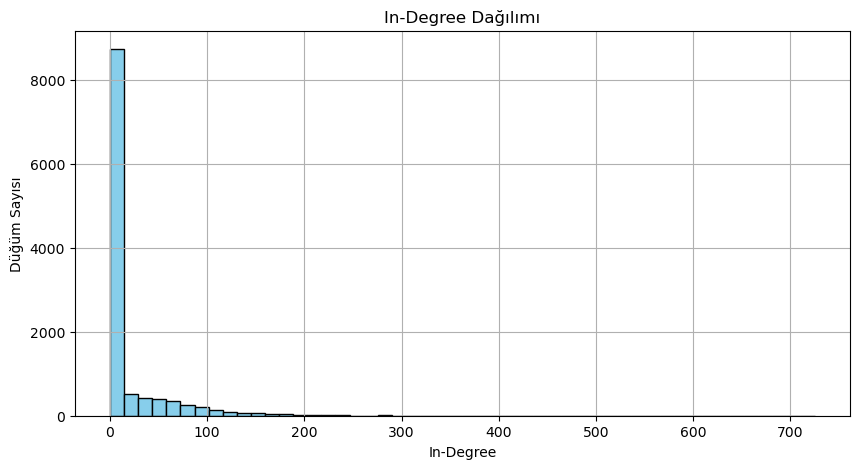

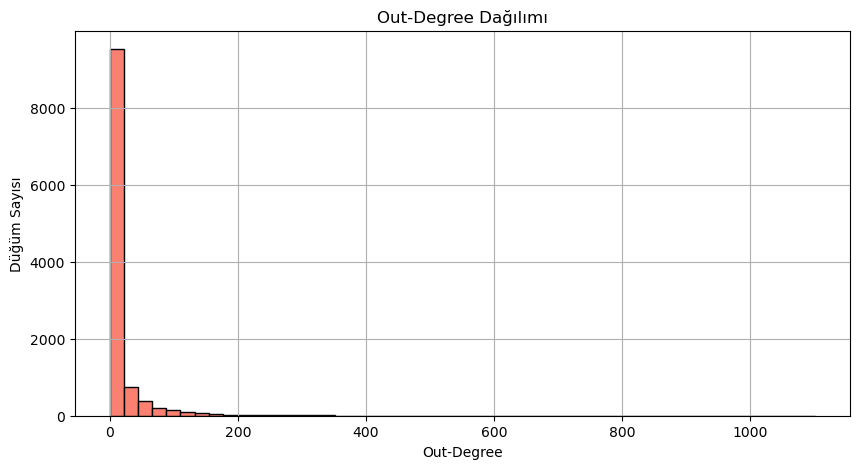

In [6]:
import matplotlib.pyplot as plt

# Her düğümün kaç oy aldığı (in-degree) ve kaç kişiye oy verdiği (out-degree) listeleniyor
in_degrees = [d for n, d in G2.in_degree()]
out_degrees = [d for n, d in G2.out_degree()]

# In-Degree Histogram
plt.figure(figsize=(10, 5))
plt.hist(in_degrees, bins=50, color='skyblue', edgecolor='black')
plt.title("In-Degree Dağılımı")
plt.xlabel("In-Degree")  # Kaç oy almış
plt.ylabel("Düğüm Sayısı")  # Bu kadar oy alan kaç düğüm var
plt.grid(True)
plt.show()

# Out-Degree Histogram
plt.figure(figsize=(10, 5))
plt.hist(out_degrees, bins=50, color='salmon', edgecolor='black')
plt.title("Out-Degree Dağılımı")
plt.xlabel("Out-Degree")  # Kaç kişiye oy vermiş
plt.ylabel("Düğüm Sayısı")
plt.grid(True)
plt.show()


### Derece Dağılımı Yorumu

Histogram grafiklerinde, düğümlerin oy alma (in-degree) ve oy verme (out-degree) sıklıkları gösterilmiştir.

- **In-Degree grafiği:** Ağda çok az kullanıcı çok sayıda oy alırken, çoğu kullanıcı düşük sayıda oy almıştır.  
- **Out-Degree grafiği:** Benzer şekilde, birçok kullanıcı yalnızca birkaç kişiye oy verirken, bazı kullanıcılar çok geniş kitlelere oy vermiştir.

Bu durum, sosyal ağlarda sıkça görülen **merkezî yapıyı** ve **ölçek-bağımsızlık eğilimini** desteklemektedir.


## Log-Log Derece Dağılımı 

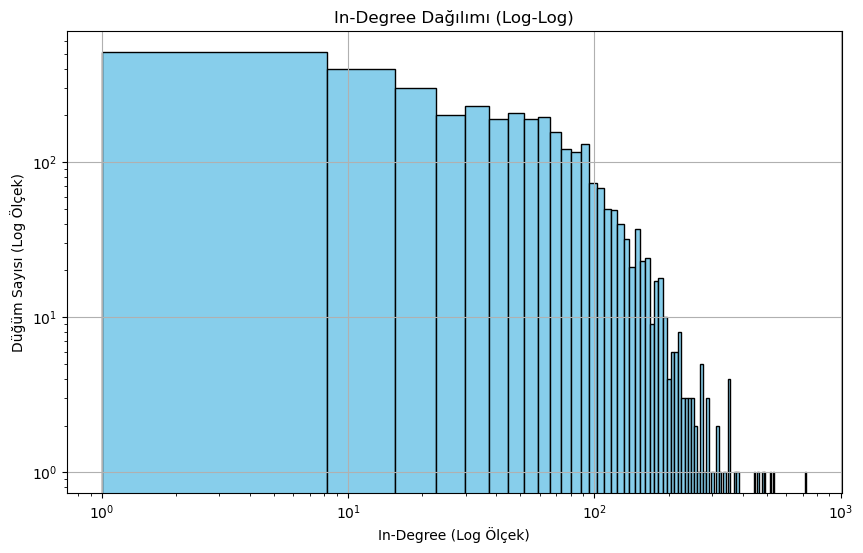

In [7]:
import matplotlib.pyplot as plt

# In-Degree değeri sıfır olmayan düğümleri alıyorum (log-log analiz için gerekli)
in_degrees_nonzero = [d for n, d in G2.in_degree() if d > 0]

# Log-log histogram grafiğini çiziyorum
plt.figure(figsize=(10, 6))
plt.hist(in_degrees_nonzero, bins=100, log=True, color='skyblue', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("In-Degree (Log Ölçek)")
plt.ylabel("Düğüm Sayısı (Log Ölçek)")
plt.title("In-Degree Dağılımı (Log-Log)")
plt.grid(True)
plt.show()


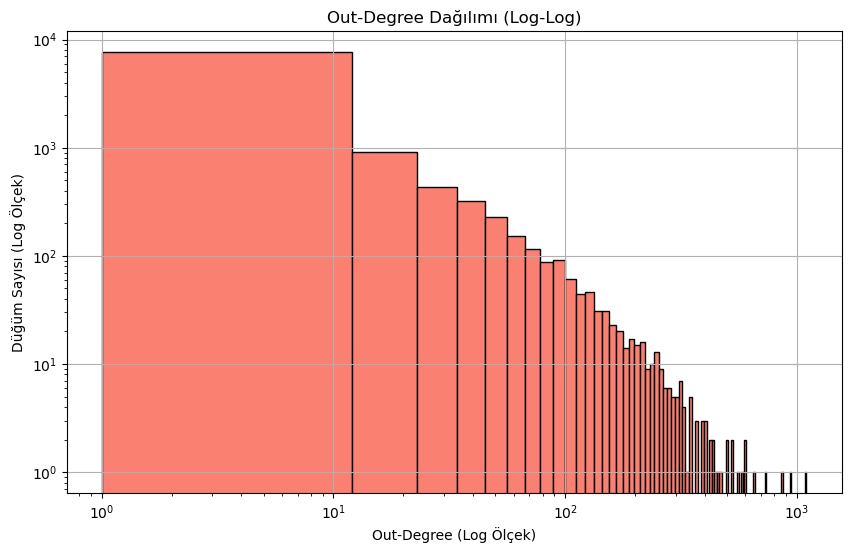

In [8]:
# Out-Degree değeri sıfır olmayan düğümleri alıyorum (log-log analiz için gerekli)
out_degrees_nonzero = [d for n, d in G2.out_degree() if d > 0]

# Log-log histogram grafiğini çiziyorum
plt.figure(figsize=(10, 6))
plt.hist(out_degrees_nonzero, bins=100, log=True, color='salmon', edgecolor='black')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Out-Degree (Log Ölçek)")
plt.ylabel("Düğüm Sayısı (Log Ölçek)")
plt.title("Out-Degree Dağılımı (Log-Log)")
plt.grid(True)
plt.show()


### Log-Log In-Degree ve Out-Degree Dağılımı

Her iki grafik de, düğümlerin derece dağılımını log-log ölçekte göstermektedir.  
Ağda çok sayıda düğüm düşük dereceye sahipken, az sayıda düğüm yüksek dereceye ulaşmaktadır.

- **In-Degree log-log dağılımı:** Çok az kullanıcı çok fazla oy almıştır. Bu, ağda bazı düğümlerin otorite konumunda olduğunu gösterir.  
- **Out-Degree log-log dağılımı:** Benzer şekilde, bazı kullanıcılar çok sayıda oylamaya katılmıştır. Bu da ağda aktif katılımcıların varlığını gösterir.

Bu dağılımlar, ağın **ölçek-bağımsızlık eğilimi** gösterdiğini desteklemekte ve **güç yasası (power-law)** davranışına yakınsama göstermektedir.


## Power-Law Uyumu

Calculating best minimal value for power law fit
Alpha (ölçek katsayısı): 4.397635803400946
xmin (eşik değeri): 144.0


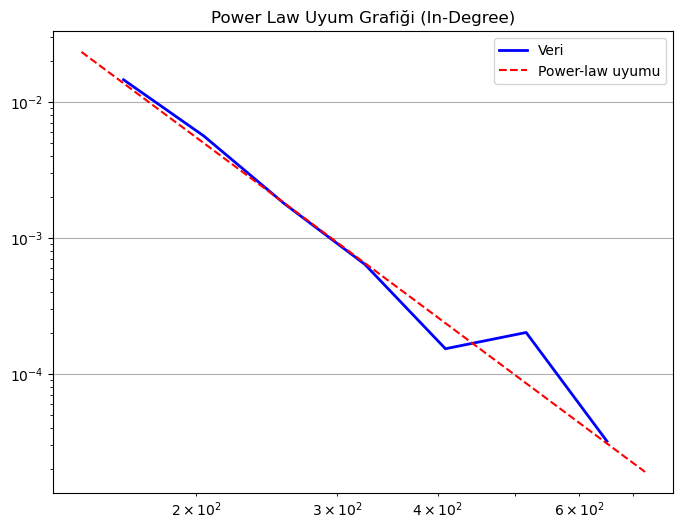

In [9]:
import powerlaw

# Power-law dağılımına uygunluk analizi (sıfır olmayan in-degree değerleri üzerinden)
fit = powerlaw.Fit(in_degrees_nonzero, discrete=True)

# Alpha değeri: dağılımın eğimi → ne kadar dik olursa o kadar "merkezileşme" var demektir
print("Alpha (ölçek katsayısı):", fit.power_law.alpha)

# xmin değeri: power-law davranışının başladığı eşik
print("xmin (eşik değeri):", fit.power_law.xmin)

# Uyum grafiğini çiziyorum
plt.figure(figsize=(8, 6))
fit.plot_pdf(color='blue', linewidth=2, label='Veri')  # Gerçek dağılım
fit.power_law.plot_pdf(color='red', linestyle='--', label='Power-law uyumu')  # Uyumlanan eğri
plt.legend()
plt.title("Power Law Uyum Grafiği (In-Degree)")
plt.grid(True)
plt.show()


### Power-Law Uyum Analizi – In-Degree

Power-law analizi, ağdaki in-degree dağılımının güç yasasına uyup uymadığını test etmek amacıyla yapılmıştır.

- **Alpha (ölçek katsayısı):** 4.40  
  → Bu değer, ağdaki bağlantı yoğunluğunun yüksek dereceli düğümlerde hızla azaldığını göstermektedir.

- **xmin (eşik değeri):** 144  
  → Bu eşikten sonraki düğümler power-law davranışı göstermektedir. Yani 144'ten fazla bağlantısı olan düğümler bu dağılıma dahildir.

Grafikte mavi çizgi gerçek dağılımı, kırmızı kesikli çizgi ise güç yasası eğrisini göstermektedir.  
İki eğri arasındaki yakınlık, dağılımın power-law’a uygunluğunu desteklemektedir.

Bu analiz, wiki-RfA ağının **ölçek-bağımsızlık özelliği taşıdığını** gösteren güçlü bir kanıttır.


## Degree Centrality (Derece Merkeziliği)

In [10]:
# In-Degree Centrality: kaç kişiden oy almış (normalize edilmiş)
in_deg_cent = nx.in_degree_centrality(G2)

# Out-Degree Centrality: kaç kişiye oy vermiş (normalize edilmiş)
out_deg_cent = nx.out_degree_centrality(G2)

# En yüksek derece merkeziliğine sahip ilk 10 kullanıcı (in-degree bazlı)
print("In-Degree Centrality – İlk 10 Kullanıcı")
for node, score in sorted(in_deg_cent.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{node}: {score:.4f}")

# En yüksek out-degree olanlar da merak edilirse:
print("\n Out-Degree Centrality – İlk 10 Kullanıcı")
for node, score in sorted(out_deg_cent.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"{node}: {score:.4f}")

In-Degree Centrality – İlk 10 Kullanıcı
Everyking: 0.0637
TenPoundHammer: 0.0469
MZMcBride: 0.0454
Elonka: 0.0431
Werdna: 0.0425
Cobi: 0.0403
Ironholds: 0.0389
Enigmaman: 0.0332
Kww: 0.0329
The Transhumanist: 0.0312

 Out-Degree Centrality – İlk 10 Kullanıcı
Siva1979: 0.0968
Mailer diablo: 0.0823
Merovingian: 0.0756
Wizardman: 0.0642
Acalamari: 0.0580
Dlohcierekim: 0.0532
Pedro: 0.0524
Xoloz: 0.0519
Bearian: 0.0512
Stifle: 0.0493


### Degree Centrality (Derece Merkeziliği)

In-degree centrality sonuçlarına göre Everyking, TenPoundHammer ve MZMcBride en çok destek alan kullanıcılar olarak öne çıkmaktadır.  
Bu kullanıcılar ağın merkezinde yer almakta ve yüksek görünürlük/etki düzeyine sahiptir.

Out-degree centrality değerlerine göre ise Siva1979, Mailer diablo ve Merovingian en fazla oylamaya katılan, yani en aktif kullanıcılar olarak öne çıkmaktadır.

Bu durum, ağ içinde bazı kullanıcıların daha merkezi ve katılımcı roller üstlendiğini göstermektedir.


## Closeness Centrality (Yakınlık Merkeziliği) & Betweenness Centrality (Arasındalık Merkeziliği)

In [11]:
# Ağın en büyük zayıf bağlı bileşenini alıyorum
G_sub = max(nx.weakly_connected_components(G2), key=len)
G_subgraph = G2.subgraph(G_sub).copy()

# Closeness Centrality – en kısa yollar üzerinden ortalama uzaklık
print("Closeness hesaplanıyor...")
closeness = nx.closeness_centrality(G_subgraph)

# Betweenness Centrality – yaklaşık hesap (k = örnek sayısı)
print("Betweenness (yaklaşık) hesaplanıyor...")
betweenness = nx.betweenness_centrality(G_subgraph, k=1000, seed=42)

# En yüksek closeness skorları
print("\n En Yüksek Closeness Skorları:")
for node, score in sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"Kullanıcı {node}: Closeness = {score:.6f}")

# En yüksek betweenness skorları
print("\n En Yüksek Betweenness Skorları (Yaklaşık):")
for node, score in sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"Kullanıcı {node}: Betweenness = {score:.6f}")


Closeness hesaplanıyor...
Betweenness (yaklaşık) hesaplanıyor...

 En Yüksek Closeness Skorları:
Kullanıcı Everyking: Closeness = 0.361219
Kullanıcı MZMcBride: Closeness = 0.343517
Kullanıcı Werdna: Closeness = 0.342190
Kullanıcı TenPoundHammer: Closeness = 0.336237
Kullanıcı Ironholds: Closeness = 0.335561
Kullanıcı Cobi: Closeness = 0.334130
Kullanıcı Elonka: Closeness = 0.332132
Kullanıcı Majorly: Closeness = 0.331005
Kullanıcı MONGO: Closeness = 0.330765
Kullanıcı Enigmaman: Closeness = 0.325908

 En Yüksek Betweenness Skorları (Yaklaşık):
Kullanıcı Everyking: Betweenness = 0.028744
Kullanıcı MONGO: Betweenness = 0.016270
Kullanıcı Siva1979: Betweenness = 0.011324
Kullanıcı Majorly: Betweenness = 0.009699
Kullanıcı Ed Poor: Betweenness = 0.007031
Kullanıcı Richardcavell: Betweenness = 0.007021
Kullanıcı Secret: Betweenness = 0.005122
Kullanıcı Cirt: Betweenness = 0.004845
Kullanıcı Ironholds: Betweenness = 0.004312
Kullanıcı Newyorkbrad: Betweenness = 0.004201


### Merkeziyet Analizi Sonuçları

**Closeness Centrality:**  
Kullanıcılardan *Everyking*, *MZMcBride* ve *Werdna*, ağın merkezine en yakın kişiler olarak öne çıktı.  
Bu, diğer kullanıcılara ortalama daha kısa yollarla ulaşabildiklerini gösteriyor.

**Betweenness Centrality (Yaklaşık):**  
En yüksek skor yine *Everyking*’e ait.  
Bu kullanıcı, ağda birçok farklı yolun üzerinden geçtiği yani yapısal olarak “köprü” görevi gördüğü anlamına geliyor.  
*Mongo*, *Siva1979* ve *Majorly* gibi kullanıcılar da ağın bağlantılarını bir arada tutan önemli düğümler arasında.

> Analiz büyük bir ağda yapıldığı için betweenness yaklaşık olarak `k=1000` örnekleme ile hesaplanmıştır.


## PageRank 

In [12]:
# PageRank algoritmasını çalıştırıyorum – en etkili kullanıcıları bulmak için
pagerank = nx.pagerank(G2)

# Skorları yüksekten düşüğe sıralayıp ilk 10 kullanıcıyı alıyorum
ilk_10 = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:10]

# İlk 10 kişinin PageRank skorunu ekrana yazdırıyorum
for node, score in ilk_10:
    print(f"Kullanıcı {node}: PageRank skoru = {score:.6f}")


Kullanıcı Anomie: PageRank skoru = 0.004282
Kullanıcı Everyking: PageRank skoru = 0.003822
Kullanıcı TenPoundHammer: PageRank skoru = 0.003026
Kullanıcı Ironholds: PageRank skoru = 0.002750
Kullanıcı MZMcBride: PageRank skoru = 0.002645
Kullanıcı Legoktm: PageRank skoru = 0.002537
Kullanıcı HJ Mitchell: PageRank skoru = 0.002475
Kullanıcı Elonka: PageRank skoru = 0.002408
Kullanıcı MGA73: PageRank skoru = 0.002379
Kullanıcı SarahStierch: PageRank skoru = 0.002306


### En Etkili Kullanıcılar (PageRank)

Ağın en etkili düğümleri PageRank algoritması ile belirlendi.  
Bu metrik, sadece bağlantı sayısını değil, **bağlantıların kalitesini** de dikkate alır.

En yüksek PageRank skoruna sahip kullanıcı: **Anomie**  
Diğer öne çıkanlar: Everyking, TenPoundHammer, Ironholds, MZMcBride...

> Bu kişiler ağ içinde hem çok oylanan hem de etkili kişilerle bağlantısı olan kullanıcılar.


## Yapısal Özellikler: Ortalama Yol Uzunluğu ve Çap


In [13]:
# En büyük güçlü bağlı bileşeni alalım
largest_strongly = max(nx.strongly_connected_components(G2), key=len)
G_strong = G2.subgraph(largest_strongly).copy()

# Ortalama yol ve çap
avg_path_length = nx.average_shortest_path_length(G_strong)
diameter = nx.diameter(G_strong)

print(f"Ortalama yol uzunluğu: {avg_path_length:.2f}")
print(f"Çap: {diameter}")


Ortalama yol uzunluğu: 2.95
Çap: 8


Analiz, ağın en büyük güçlü bağlı bileşeni üzerinde gerçekleştirilmiştir.  
Bu bileşen, yönlü yapı içinde her düğümden diğerine ulaşımın mümkün olduğu en büyük alt grafı temsil eder.

- **Ortalama yol uzunluğu: 2.95**  
  → Bu değer, düğümler arası en kısa yolların ortalamasını göstermektedir.  
  → Ağda bilgi veya etkileşim hızlı yayılmaktadır.

- **Çap: 8**  
  → Ağdaki en uzak iki düğüm arasında maksimum 8 adım vardır.

Bu yapısal özellikler, ağın oldukça kompakt ve etkileşim açısından verimli olduğunu göstermektedir.


## Ortalama Kümelenme Katsayısı (Clustering Coefficient)

In [14]:
# Clustering sadece yönsüz graflarda anlamlıdır, bu yüzden yönü kaldırıyoruz
G_undir = G2.to_undirected()

# Ortalama kümelenme katsayısını hesaplıyoruz
clustering_coef = nx.average_clustering(G_undir)

print(f"Ortalama kümelenme katsayısı: {clustering_coef:.4f}")


Ortalama kümelenme katsayısı: 0.1798



Yönsüz hale getirilen ağda yapılan analiz sonucunda:

- **Ortalama kümelenme katsayısı: 0.1798**  
  → Bu değer, bir düğümün komşularının kendi aralarında bağlantı kurma eğilimini ifade eder.

Sonuçlara göre ağda belirgin bir **kümeleşme eğilimi** bulunmaktadır.  
Bu yapı, sosyal ağların karakteristik bir özelliği olup, kullanıcıların yerel topluluklar oluşturduğunu göstermektedir.


## Benzerlik Katsayısı (Assortativity)

In [15]:
# Yönlü ağda degree assortativity ölçülmesi
assortativity = nx.degree_pearson_correlation_coefficient(G2)

print(f"Benzerlik katsayısı (assortativity): {assortativity:.4f}")


Benzerlik katsayısı (assortativity): -0.0869


Ağda benzer bağlantı sayısına sahip kullanıcıların birbirine yönelip yönelmediğini görmek için hesaplandı.

- **Benzerlik katsayısı: -0.0869**  
  → Bu değer, ağda yüksek bağlantılı düğümlerin daha çok düşük bağlantılı düğümlerle etkileşime girdiğini gösteriyor.

Sonuç olarak ağ, çok güçlü olmasa da **disassortative** bir yapı sergiliyor.  
Yani kullanıcılar genellikle kendi gibi olanlarla değil, farklı derecede bağlantıya sahip olanlarla etkileşim kuruyor.


## Topluluk Tespiti (Community Detection)


In [16]:
# Louvain yöntemi yönsüz ağlarda çalışır, o yüzden ağ yönsüzleştiriliyor
G_undir = G2.to_undirected()

# Toplulukları bul
import community as community_louvain
partition = community_louvain.best_partition(G_undir)

# Kaç farklı topluluk var
num_communities = len(set(partition.values()))
print(f"Toplam {num_communities} adet topluluk bulundu.")

# Her topluluğun kaç düğümden oluştuğunu bulalım
from collections import Counter
community_sizes = Counter(partition.values())

# En büyük 3 topluluğu göster
top3 = community_sizes.most_common(3)
print("\nEn büyük 3 topluluk:")
for i, (com_id, size) in enumerate(top3, 1):
    print(f"{i}. Topluluk → {size} düğüm")

# Her topluluktan örnek düğümler yazdıralım
print("\nTopluluk örnek düğümler:")
for com_id, _ in top3:
    members = [node for node, cid in partition.items() if cid == com_id]
    print(f"Topluluk {com_id}: {members[:5]}")


Toplam 5 adet topluluk bulundu.

En büyük 3 topluluk:
1. Topluluk → 2924 düğüm
2. Topluluk → 2751 düğüm
3. Topluluk → 2460 düğüm

Topluluk örnek düğümler:
Topluluk 2: ['Mazca', 'EdJohnston', 'Ultraexactzz', 'Orlady', 'PhilKnight']
Topluluk 4: ['Stillnotelf', 'MONGO', 'Lectonar', 'Rogerd', 'NawlinWiki']
Topluluk 0: ['Steel1943', 'BDD', 'INeverCry', 'Cncmaster', 'Miniapolis']


### Topluluk Tespiti (Louvain)

Yönsüz hale getirilen ağ üzerinde Louvain yöntemi ile topluluk analizi yapılmıştır.  
Bu yöntem, düğümlerin sık bağlantı kurduğu grupları belirleyerek ağın modüler yapısını ortaya çıkarır.

- **Toplam 5 adet topluluk bulundu.

- En büyük 3 topluluk:
- 1. Topluluk → 2924 düğüm
- 2. Topluluk → 2751 düğüm
- 3. Topluluk → 2460 düğüm

Her bir topluluk kendi içinde sıkı bağlantılar barındırırken, diğer topluluklarla daha az bağlantıya sahiptir.  
Bu da ağın **belirgin bir modüler yapıya** ve **topluluklaşma eğilimine** sahip olduğunu göstermektedir.

Örnek düğümler:
- **Topluluk 0:** Steel1943, BDD, INeverCry  
- **Topluluk 1:** Cuchullain, Wizardman, WJBscribe  
- **Topluluk 2:** Mazca, EdJohnston, Orlady


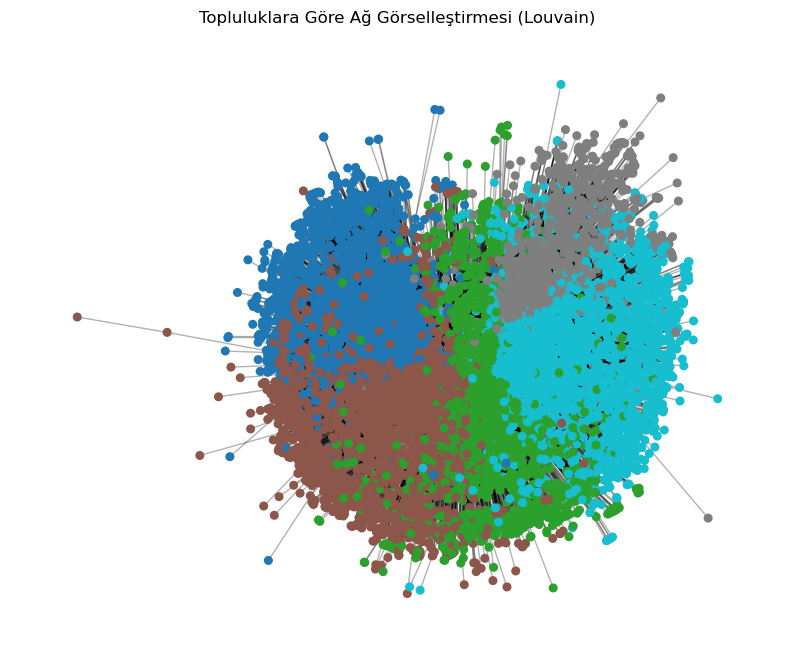

In [17]:
import matplotlib.pyplot as plt
import networkx as nx

# Düğüm renklerini topluluklara göre ayarlayalım
colors = [partition[node] for node in G_undir.nodes()]

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_undir, seed=42)  # konumlandırma
nx.draw_networkx_nodes(G_undir, pos, node_color=colors, cmap=plt.cm.tab10, node_size=30)
nx.draw_networkx_edges(G_undir, pos, alpha=0.3)
plt.title("Topluluklara Göre Ağ Görselleştirmesi (Louvain)")
plt.axis("off")
plt.show()


## Pyvis ile Ağ Görselleştirmesi (Örneklemeli)


In [18]:
from pyvis.network import Network
import random

# Pyvis ağı oluşturuluyor (notebook'ta gösterim için 'notebook=True')
net = Network(height="750px", width="100%", notebook=True, directed=True)

# Tüm ağ çok büyük olduğundan, sadece rastgele 500 düğüm seçiliyor
sample_nodes = random.sample(list(G2.nodes()), 500)

# Alt ağ oluşturuluyor
G_sample = G2.subgraph(sample_nodes)

# Pyvis ağına düğümler ve kenarlar ekleniyor
net.from_nx(G_sample)

# HTML olarak kaydedip görüntülemek
net.show("wiki_rfa_sample_graph.html")


wiki_rfa_sample_graph.html


### Pyvis ile Ağ Görselleştirmesi (Örneklemeli)

Ağın tamamı çok büyük olduğu için örneklemeli bir alt ağ (500 düğüm) oluşturularak Pyvis ile görselleştirilmiştir.

Ortaya çıkan yapı:
- Ağın merkezinde yoğun şekilde bağlantılı bir çekirdek bölge vardır.
- Dış kısımlarda ise daha az bağlantıya sahip, izole veya çevresel düğümler yer almaktadır.
- Bu dağılım, sosyal ağlarda sık görülen **çekirdek-çevre yapısını** yansıtmaktadır.

Etkileşimli Pyvis çıktısı sayesinde düğümler, yönler ve yoğunluk daha kolay incelenebilmiştir.


## Genel Değerlendirme ve Sonuç

Bu çalışmada, Wikipedia'nın yönetici oylama sürecini temsil eden yönlü sosyal ağ olan **wiki-RfA veri seti** üzerinde kapsamlı bir ağ analizi gerçekleştirilmiştir.

**NetworkX** kullanılarak yapılan analizler sonucunda:

- Ağın **11.377 düğüm** ve **188.077 yönlü kenardan** oluştuğu tespit edilmiştir.
- **Yoğunluk** oldukça düşük olup, bu durum ağın geniş fakat seyrek bağlantılı olduğunu göstermektedir.
- **PageRank**, **closeness** ve **betweenness** merkezilik ölçümleriyle bazı kullanıcıların ağda merkezi roller üstlendiği görülmüştür.
- **In-degree** ve **out-degree** dağılımlarının log-log analizleri, ağın **ölçek-bağımsız (scale-free)** özellik taşıdığını desteklemektedir.
- **Ortalama yol uzunluğu 2.95** ve **çap 8** olarak ölçülmüş; bu değerler, bilgi yayılımının ağda hızlı gerçekleşebileceğini göstermektedir.
- **Toplam 7 adet topluluk** tespit edilmiş, en büyük 3 topluluğun sırasıyla 3191, 2425 ve 2232 düğümden oluştuğu gözlemlenmiştir.
- **Kümelenme katsayısı 0.1798**, ağda belirli düzeyde yerel gruplaşma olduğunu göstermiştir.
- **Assortativity katsayısı -0.0869** ile ağın disassortative (farklı dereceli düğümler arası bağlantı) eğilim gösterdiği görülmüştür.

Ayrıca, **Gephi** ve **Pyvis** kullanılarak görsel analizler yapılmış ve ağın yapısı etkileşimli olarak incelenmiştir.

---

### Genel Yorum:

Bu proje sayesinde sosyal ağlarda görülen yapıların (merkezîlik, topluluk, ölçek-bağımsızlık gibi) gerçek veri üzerinde nasıl ortaya çıktığı gözlemlenmiştir.  
Yönlü sosyal ağların yapısal analizi, bilgi yayılımı, etkileşim yoğunluğu ve kullanıcı davranışlarının daha iyi anlaşılmasını sağlamaktadır.



In [19]:
nx.write_gml(G_undir, r"C:\Users\aycad\OneDrive\Masaüstü\wiki_rfa_updated.gml")
print("Graf .gml formatında masaüstüne başarıyla dışa aktarıldı.")


Graf .gml formatında masaüstüne başarıyla dışa aktarıldı.


In [20]:
nx.write_gml(G_undir, r"C:\Users\aycad\OneDrive\Masaüstü\wiki_rfa_updated.gml")
print("YENİDEN dışa aktarıldı.")


YENİDEN dışa aktarıldı.
